# 04-1 로지스틱 회귀
### 로지스틱 알고리즘과 이진 분류 문제에서 클래스 확률 예측
---
</br>

💡용어 정리💡  
❓ 다중 분류 ➡️ 타깃 데이터에 2개 이상의 클래스 포함  
❓ 로지스틱 회귀 ➡️ 선형 방정식을 학습하는 모델, 이름은 회귀이지만 분류모델!  
 (시그모이드 함수)
❓ 불리언 인덱싱(boolean indexing) ➡️ True, False 값을 전달하여 행 선택  

In [ ]:
import pandas as pd

fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# Species 열의 고유한 값 추출 --> 생선 종류 7종 출력
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3) # 최근접 이웃 개수(k) 3으로 고정

kn.fit(train_scaled, train_target)
      
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_) # KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장됨!
# Bream이 첫 번째 클래스, Parkki가 두 번째 클래스 ,,, 순으로 저장됨

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5])) # 테스트 세트의 처음 5가지 샘플 출력

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


- 각 행은 테스트 샘플별로, 7가지 생선 클래스에 대한 확률!  
 첫 번째 샘플 -> [0. (<- 첫 번째 클래스 bream에 대한 확률!) 0. (<- 두 번째 클래스 parkki에 대한 확률!) 0.6 0. 0.4 0. 0. ]  

In [ ]:
import numpy as np

# predict_proba() --> 클래스별 확률값 반환
proba = kn.predict_proba(test_scaled[:5])

# round() --> 기본으로는 소수점 첫째 자리에서 반올림
print(np.round(proba, decimals=4)) # decimals=4 --> 소수점 다섯 번째 자리에서 반올림 후 4번째 자리까지 표기

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 테스트 세트의 4번째 샘플의 이웃들 거리와 인덱스

print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


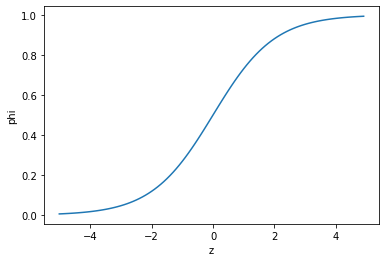

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
# 시그모이드 함수 계산
phi = 1 / (1 + np.exp(-z)) # np.exp() --> 지수 함수 계산
plt.plot(z, phi)

plt.xlabel('z')
plt.ylabel('phi')

plt.show()

### 이진 분류  
- 시그모이드 함수를 사용해 z를 0과 1사이의 값으로 변환  

**다중 분류 수행 전 이진 분류 학습**

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]]) # A와 C만 True --> 두 원소만 골라낼 수 있음!

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # train_target이 bream 혹은 smelt이면 True

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
# 로지스틱 회귀 모델 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 모델 훈련
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5])) # 훈련 데이터의 처음 5개 샘플 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


- trian_bream_smelt에 들어있는 샘풀의 예측 확률을 확인하면? --> 도미 혹은 방어가 될 확률 표시  
- 출력 데이터로 두 열 출력 둘 중 어느 열이 도미? 방어? --> 사이킷런은 타깃값을 알파벳순으로 정렬!  
 --> 따라서, bream -> smelt 순  
- 두 열의 특성은? --> 첫 번째 열이 음성 클래스(0)에 대한 확률, 두 번째 열이 양성 클래스(1)에 대한 확률  

In [ ]:
# predict_proba() --> 샘플의 예측 확률
print(lr.predict_proba(train_bream_smelt[:5])) # 훈련 데이터의 처음 5개 샘플의 예측 확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_) # 사이킷런은 알파벳 순으로 정렬! (bream->0, smelt->1)

['Bream' 'Smelt']


**z = -0.404 * (weight) - 0.576 * (length) - 0.663 * (diagonal) - 1.013 * (height) - 0.732 * 9width) - 2.161**

In [ ]:
print(lr.coef_, lr.intercept_) # 로지스틱 회귀 모델이 학습한 계수 확인

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


- z 값을 시그모이드 함수에 통과시키면 확률을 얻음!  

In [ ]:
# decision_function() --> z값 출력 함수
decisions = lr.decision_function(train_bream_smelt[:5]) # 테스트 세트의 처음 5개 샘플 z 값 출력
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# expit() --> 사이파이(scipy) 라이브러리의 시그모이드 함수!
from scipy.special import expit

# decisions 배열을(z값) 시그모이드 함수에 대입
# 앞에서 구한 샘플 예측 확률의 2열과 값이 같음!
# decision_function() --> 양성 클래스에 대한 z값 반환! 따라서, 양성인 smelt(1)의 확률만 반환함
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 다중 분류  
- softmax 함수를 이용하여 7개의 z 값을 확률로 변환  
- softmax()  
 1. 7개의 z 값의 이름을 z1~z7 이라 명명  
 2. z1\~z7 까지의 값을 이용해 지수 함수 e^z1~e^z7 계산
 3. 지수 함수 e^z1~e^z7을 모두 더해서, e_sum 생성  
 4. 각각의 지수함수 e^z1\~e^z7을 e_sum으로 나눔 (나눈 값을 s1~s7이라 명명)
 > s1~s7 을 모두 더하면, 1이 나옴!
 > (따라서, 7개 생선 샘플에 대한 확률의 합은 1)

- logisticregression() 특징  
1. 계수의 제곱을 규제함 (릿지 회귀와 비슷함!) --> L2 규제  
 --> 하지만 릿지 회귀의 alpha와는 반대로 C의 값이 작을수록 규제가 커짐  
2. C --> 규제를 제어하는 매개변수(기본값=1)  
- 코드에서는 규제를 완화하기 위해 20으로 설정  

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)

# logisticregression으로 훈련 fit 진행
# 앞 코드와는 다르게(도미와 방어 이진 분류 코드) 생선 7종의 샘플 전부 사용
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5])) # 테스트 세트의 처음 5개 샘플 predict

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


**테스트 세트의 5개 샘플의 예측 확률을 분석했으므로 행은 5개, 생선 샘플은 7종 이었으므로 열은 7개**

In [ ]:
# 테스트 세트 처음 5개 샘플의 예측 확률 분석
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) # 소수점 4번째 자리에서 반올림, 3번째 자리까지 표시

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


**다중 분류일 경우의 선형 방정식 형태 확인**

In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


**테스트 세트 처음 5개의 샘플의 z1~z7 값 구하기**

In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax

# 위에서 구한 z값을 softmax함수에 전달
# axis=1 지정 안하면, 배열 전체에 대해 softmax() 계산
proba = softmax(decision, axis=1) # axis=1 --> 각 행, 즉 각 샘플에 대해 softmax() 계산

print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
